In [1]:
# Default imports
import pathlib
# Local imports
from matplotlib import pyplot as plt
import utils
from importlib import reload

# visitual imports
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# Debug
reload(utils)

<module 'utils' from '/Users/home/Experiments/transform/transforms_ml/utils.py'>

In [2]:
# Constants
data_path = pathlib.Path("data", "us.txt")

In [3]:
list_of_names = utils.read_data(data_path, True)

In [4]:
# Context about the data
# small name in the dataset
smallest_name_len = min(len(name) for name in list_of_names)
smallest_name = [name for name in list_of_names if len(name) == smallest_name_len][0]
# Biggest name in the dataset
biggest_name_len = max(len(name) for name in list_of_names)
biggest_name = [name for name in list_of_names if len(name) == biggest_name_len][0]

print(
    "The smallest name in the dataset is '{}' which is '{}' char lenght.".format(
        smallest_name, smallest_name_len
    )
)
print(
    "The biggest name in the dataset is '{}' which is '{}' lenght.".format(
        biggest_name, biggest_name_len
    )
)

The smallest name in the dataset is 'Ai' which is '2' char lenght.
The biggest name in the dataset is 'Alejandrina' which is '11' lenght.


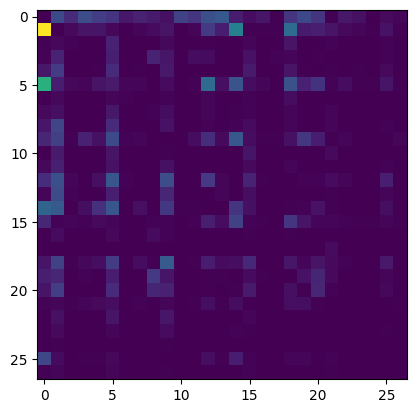

In [5]:
END_CHAR = "."
list_unique_char = utils.get_unique_chars("".join(list_of_names).lower())

string_to_int = utils.str_to_int(list_unique_char)
string_to_int[END_CHAR] = 0
int_to_string = utils.int_to_str(string_to_int)
pair_multidiarray = utils.get_pairchar_lookup_table(list_of_names, END_CHAR)
plt.imshow(pair_multidiarray)

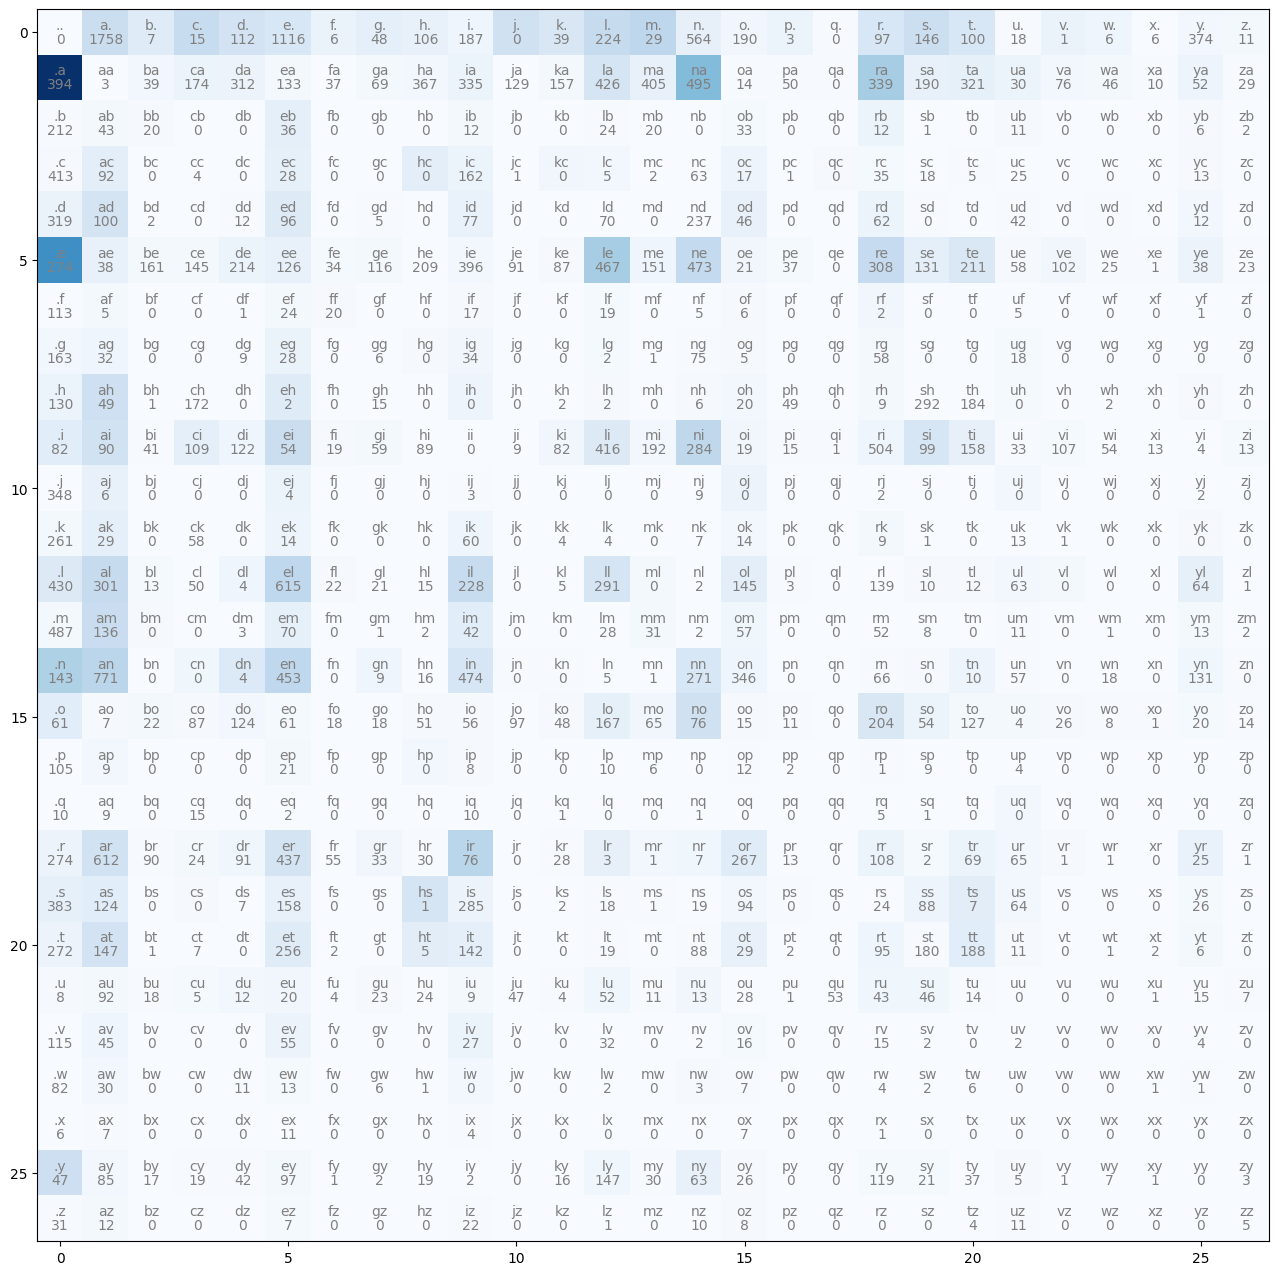

In [6]:
plt.figure(figsize=(16, 16))
plt.imshow(pair_multidiarray, cmap="Blues")


for i in range(27):
    for j in range(27):
        char_str = int_to_string[i] + int_to_string[j]
        plt.text(i, j, char_str, ha="center", va="bottom", color="gray")
        plt.text(
            j, i, pair_multidiarray[j, i].item(), ha="center", va="top", color="gray"
        )

In [7]:
genrator = torch.Generator().manual_seed(1234555)
propablity = pair_multidiarray[0].float()
propablity = propablity / propablity.sum()

propablity

tensor([0.0000, 0.0763, 0.0411, 0.0800, 0.0618, 0.0531, 0.0219, 0.0316, 0.0252,
        0.0159, 0.0674, 0.0506, 0.0833, 0.0943, 0.0277, 0.0118, 0.0203, 0.0019,
        0.0531, 0.0742, 0.0527, 0.0015, 0.0223, 0.0159, 0.0012, 0.0091, 0.0060])

In [8]:
pair = (pair_multidiarray + 1).float()
pair /= pair.sum(1, keepdims=True)

In [9]:
# Let predict 10 names
for each_name in range(100):
    predict_char = []
    char_index = 0
    while True:
        propablity = pair[char_index]
        # propablity = pair_multidiarray[char_index].float()
        # propablity = propablity / propablity.sum()
        char_index = torch.multinomial(
            propablity, num_samples=1, replacement=True, generator=genrator
        ).item()
        if not char_index:
            break
        predict_char.append(int_to_string[char_index])

    print("".join(predict_char))

vand
selle
anna
ja
dann
jeed
ge
lorthera
volpa
da
ch
susadrdnnirl
betain
don
va
lktenetitthterokanenenn
wikisoleleydoynalom
tusshvely
peaberlys
jglmarabeath
vorinne
rcewia
krce
a
cave
a
strra
cholvenkandfarilletwa
dee
cylaxidancara
dartrasheraneya
dia
lauta
adothony
danick
neicha
cceda
flarmela
juday
h
lpinigge
ararovasachave
larue
a
o
kegielivechefta
vengeyn
rmatashayniosha
cumupamobbuno
ckereraepenamaurdaret
ke
ttwhngielesangos
kaca
ca
elerinilel
runioman
sayrleoconencartary
kitholare
ma
nash
rda
relllvenndo
n
llanoran
ja
jonrtele
hauka
mer
sh
a
venarnieletrahajorie
pa
mica
sawarrale
furona
za
joritay
ta
rynna
sawima
enerimie
ene
migararinttie
se
san
sa
tynarl
evishe
ja
s
melia
lla
edieobotin
asaneedisa
ranilpinahon
llany
je
paug
delaze
kanth


In [11]:
# quality of the model training (By identifiing the training loss)
# To calcualte the traning loss we use maximum likehood estimatation

utils.get_bigram_model(["nambi"], pair)

.n: 0.0529865138232708 -2.937717914581299
na: 0.033804237842559814 -6.324887275695801
am: 0.021678471937775612 -10.156322479248047
mb: 0.0009033423848450184 -17.16573143005371
bi: 0.0021786491852253675 -23.294780731201172
i.: 0.017563117668032646 -27.336734771728516
logprob=tensor(-4.0420)
27.336734771728516
tensor(4.5561)


tensor(4.5561)